<a href="https://colab.research.google.com/github/bombaybrew/colab_experiments/blob/master/mnist_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn import metrics

# load the images into memory
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# summarize the shape of the dataset
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


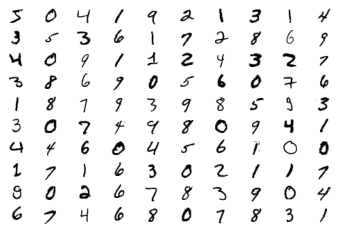

In [2]:
for idx in range(100):
  plt.subplot(10, 10, 1+idx)
  plt.axis('off')
  plt.imshow(x_train[idx], cmap='gray_r')

In [3]:
def get_discriminator(in_shape=(28,28,1)):
  model = keras.Sequential()
  model.add(layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'))
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Dropout(0.4))
  model.add(layers.Flatten())
  model.add(layers.Dense(1, activation='sigmoid'))
  # compile model
  opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  print(model.summary())
  return model

discriminator = get_discriminator()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [6]:
def get_generator(latent_dim):
  model = Sequential()
  n_nodes = 128*7*7
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7, 7, 128)))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
  return model

In [ ]:
def load_real_samples():
  return x_train / 255.0

def generate_real_samples(data, n_samples):
  idx = randint(0, dataset.shape[0], n_samples)
  X = dataset[idx]
  y = ones((n_samples, 1))
  return X, y

